In [1]:
from pathlib import Path
from ase.visualize import view, plot
from ase.io import read
from matplotlib import pyplot as plt

In [2]:
BASE_PATH = Path(".").resolve()
structs_path = BASE_PATH / "structs"

In [3]:
def viz_azo(fptr, fig=None, ax=None, idx=None, rot="0x,90y,90z", offsets=((0, 0), (0, -6.5))):
    if idx is not None:
        atoms = read(structs_path / fptr, index=idx)
    else:
        atoms = read(structs_path / fptr)
    azo = atoms[:112]
    meth = atoms[112:]
    mclr = ["r" for _ in meth]
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=[9, 9])
    plot.plot_atoms(azo, ax, rotation=(rot), offset=offsets[0])
    plot.plot_atoms(meth, ax, rotation=(rot), colors=mclr , offset=offsets[1])
    ax.set_ylim(ymin=-1, ymax=16)
    return fig, ax

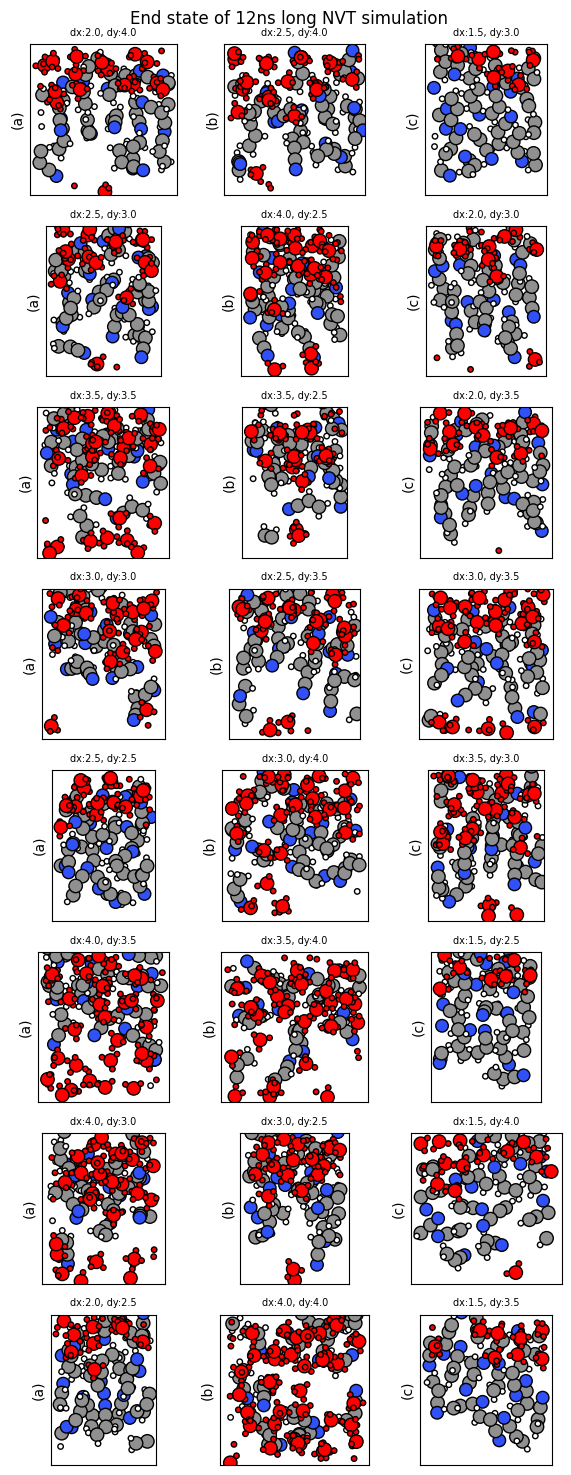

In [8]:
idx = None
prefix_len = 9
fig, ax = plt.subplots(8, 3, figsize=[6, 15])
idx_dict = {None: "End", 0:"Initial"}
fig.suptitle(f"{idx_dict[idx]} state of 12ns long NVT simulation")
labels = "abcdefghijklmnopqrstuvwxyz"
count = 0

for fptr in structs_path.iterdir():
    xyz = str(fptr).split("/")[-1]
    if xyz.split(".")[-1] == "xyz":
        name = xyz.split(".")[0]
        if name[:prefix_len] == "staggered" and len(name) > 6:
            tmp = name.split("_")[0][prefix_len:]
            xval = str(int(tmp[1:3]) / 10)
            yval = str(int(tmp[4:]) / 10)
            title = f"dx:{xval}, dy:{yval}"
            r = count // 3
            c = count % 3
            try:
                viz_azo(f"{name}.xyz", ax=ax[r][c], idx=idx)
                ax[r][c].axes.get_xaxis().set_ticks([])
                ax[r][c].axes.get_yaxis().set_ticks([])
                ax[r][c].set_title(title, fontsize=7)
                ax[r][c].set_ylabel(f"({labels[c]})")
                count += 1
            except IndexError:
                continue
fig.tight_layout()

Here
Here
Not Here
Not Here


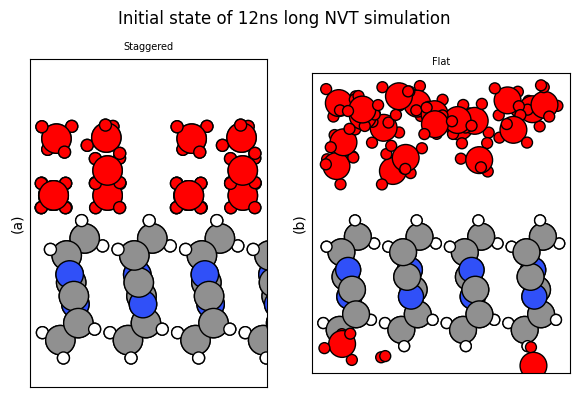

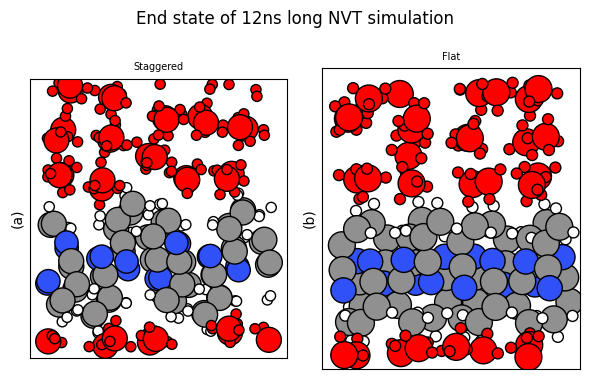

In [58]:
idx=[0, None]
idx_dict = {None: "End", 0:"Initial"}
fptr = ["221_js2.xyz", "flatx40y35_221.xyz"]
config = ["Staggered", "Flat"]
labels = "abcdefghijklmnopqrstuvwxyz"

for i in idx:
    fig, ax = plt.subplots(1, 2, figsize=[6, 4])
    fig.suptitle(f"{idx_dict[i]} state of 12ns long NVT simulation")
    for c, xyz in enumerate(fptr):
        viz_azo(xyz, ax=ax[c], idx=i)
        ax[c].axes.get_xaxis().set_ticks([])
        ax[c].axes.get_yaxis().set_ticks([])
        ax[c].set_title(config[c], fontsize=7)
        ax[c].set_ylabel(f"({labels[c]})")
    fig.tight_layout()


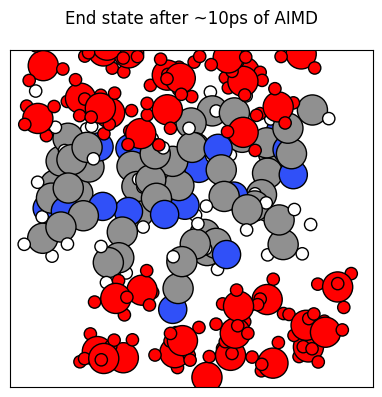

In [27]:
xyz = "221_md_res-pos-1.xyz"
title = "End state after ~10ps of AIMD"
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
fig.suptitle(title)
viz_azo(xyz, ax=ax, idx=None)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
fig.tight_layout()

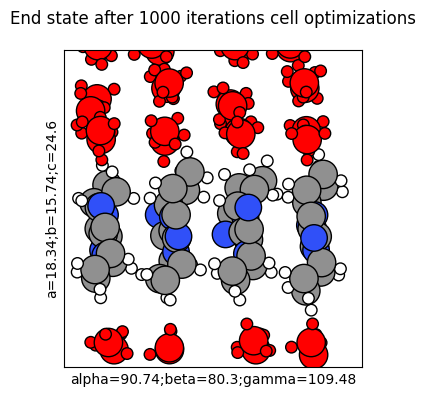

In [46]:
xyz = "221_cell_ang-pos-1.xyz"
title = "End state after 1000 iterations cell optimizations"
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
fig.suptitle(title)
viz_azo(xyz, ax=ax, idx=None, offsets=((0, -6.5), (0, -6.5)), rot="0x,90y,90z")
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
ax.set_ylabel("a=18.34;b=15.74;c=24.6")
ax.set_xlabel("alpha=90.74;beta=80.3;gamma=109.48")
fig.tight_layout()

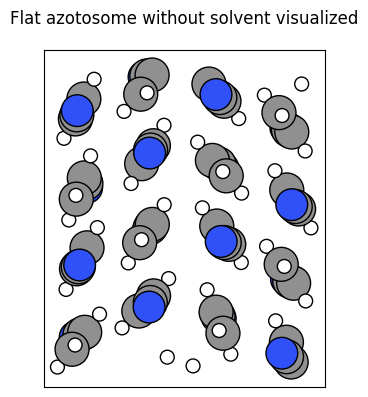

In [54]:
xyz = "flatx40y35_221.xyz"
title = "Flat azotosome without solvent visualized"
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
fig.suptitle(title)
viz_azo(xyz, ax=ax, idx=None, rot="0x,0y,0z")
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
fig.tight_layout()